# Covid-19 (Corona Virus) Dataset in South Korea
## by Cherif Arsanious



## Investigation Overview

> I wanted to investigate what factors could be playing key roles in spreading the coronavirus (covid-19) among patients in South Korea.

## Dataset Overview

> My main dataset is PatientInfo.csv dataset. It complies with the requirements that were asked for a dataset different from the ones available on udacity platform of the project
Dataset Requirements:
* include at least 600 observations. (This is the number of rows after tidying your data - see the bullet point below about tidy data.) --> My dataset contains 2243 observations
* include at least eight variables --> my dataset contains 18 variables
* include at least one qualitative / categorical variable. (This can also be engineered / created.) --> my dataset contains more than 10 categorical variables
* include at least one numeric variable. --> my dataset contains one numeric variable
* be in a tidy format. In a nutshell, tidy data has each row as a single observation and each column reporting a single variable. --> The dataset was cleaned by kaggle website already and ready for analysis and visualizations
* be in a common data format. This includes .csv, .tsv, .txt, and .xls. Basically, there should be a reasonable pandas.read_*() function to open up your data in a tidy format as a pandas DataFrame. --> the PatientInfo dataset is stored in .csv format

> I included two additional small datasets Weather.csv, and Region.csv that were not required for this project but I felt they behold interesting information about the Covid-19 virus  


In [0]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# importing my files from my github repository to be start working on my google colab jyputer notebooks
! git clone https://github.com/CherifArsanious/corona-virus-data-south-korea.git

Cloning into 'corona-virus-data-south-korea'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 56 (delta 24), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (56/56), done.


In [0]:
# load in the dataset into a pandas dataframe
patient_df = pd.read_csv('PatientInfo.csv')
df_subset = pd.read_csv('df_subset.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Patients based on Sex

> The number of female infected by the coronavirus is higher than the number of male infected. From the data gathered, 53.9% of patients were females where 41.8% where males.

Text(0.5, 1.0, 'The Distribution of Patients based on Sex')

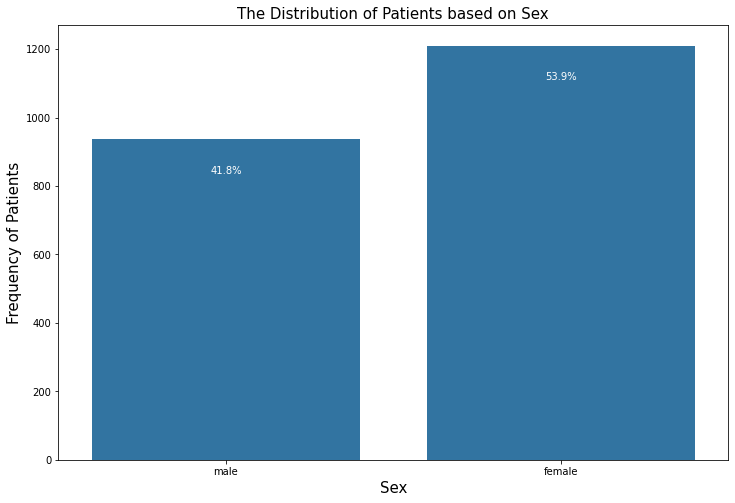

In [11]:
plt.figure(figsize=[12,8])
# checking the distribuation of patients based on sex
base_color = sb.color_palette()[0]
sb.countplot(data=patient_df,x='sex',color= base_color)
# I will add the relative frequency to get more insights
n_points = patient_df.shape[0]
sex_counts = patient_df['sex'].value_counts()
locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    count = sex_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-100, pct_string, ha='center',color='w')
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Frequency of Patients',fontsize=15)
plt.title('The Distribution of Patients based on Sex',fontsize=15)

## The Distribution of Patients based on Age Ranges

> This quiet interesting, because the media was propaganding that youth are almost protected from infection but the data of South Korea is showing other wise. The higher patient age ratio infected were the 20s with 21% of the whole patients, the second age range is the 50s with 17.6%. The myth that kids are among the least infected is still valid here with only 3.4% of the patients.

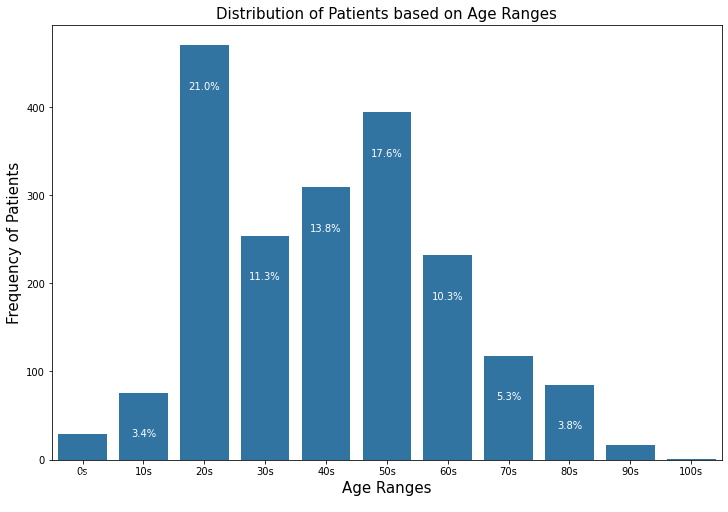

In [12]:
ages_order = ['0s','10s','20s','30s','40s','50s','60s','70s','80s','90s','100s']
ages = pd.api.types.CategoricalDtype(ordered=True, categories = ages_order)
patient_df['age']=patient_df['age'].astype(ages)
plt.figure(figsize=[12,8])
sb.countplot(data=patient_df,x='age',color=base_color)
n_points=patient_df.shape[0]
age_counts = patient_df['age'].value_counts()
locs,labels = plt.xticks()
for loc, label in zip(locs,labels):
    count = age_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc,count-50,pct_string,ha='center',color='w')
plt.xlabel('Age Ranges',fontsize=15)
plt.ylabel('Frequency of Patients',fontsize=15)
plt.title('Distribution of Patients based on Age Ranges',fontsize=15);

## The Distribution of Patients based on Age Ranges among Deceased People



This plot implies that also the age range 20s where infected the highest but the mortality rate is 0%. More than 60% of deceased patients where older than their 40s

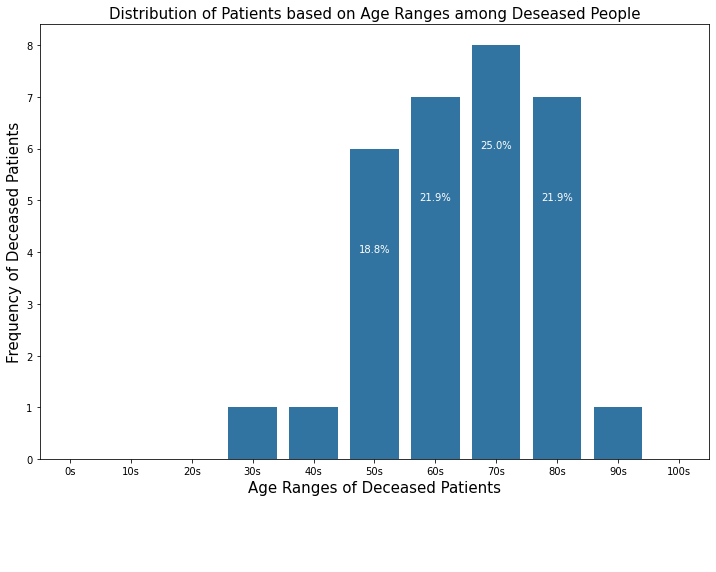

In [13]:
patient_df_deceased=patient_df[patient_df['state']=='deceased']
plt.figure(figsize=[12,8])
sb.countplot(data=patient_df_deceased,x='age',color=base_color)
n_points = patient_df_deceased.shape[0]
age_counts = patient_df_deceased['age'].value_counts()
locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    count = age_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points) 
    plt.text(loc,count-2,pct_string,ha='center',color='w')
plt.xlabel('Age Ranges of Deceased Patients',fontsize=15)
plt.ylabel('Frequency of Deceased Patients',fontsize=15)
plt.title('Distribution of Patients based on Age Ranges among Deseased People',fontsize=15);

## The Distribution of Number of People Contacted

The majority of patients contacted between 10 and 25 persons before being diagnosed with the coronavirus, and that probably explains why it is has a wide spread and transmission, specially the virus has an incubation period of 14 days.

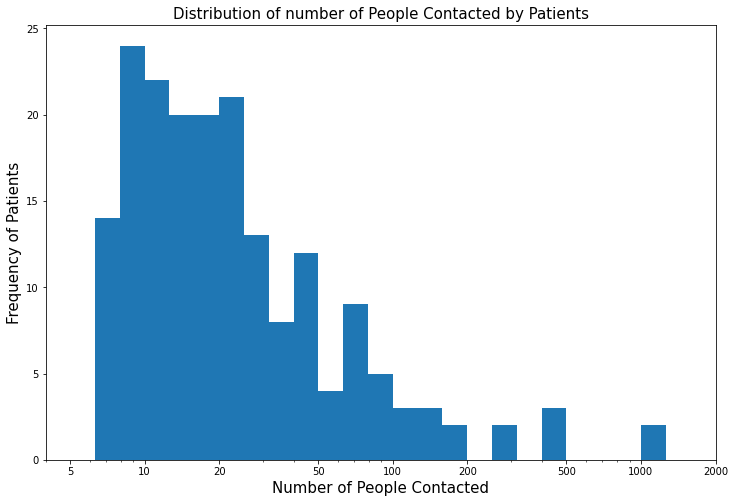

In [14]:
plt.figure(figsize=[12,8])
bin_edges = 10**np.arange(0.8,np.log10(patient_df['contact_number'].max())+0.1,0.1)
plt.hist(data= patient_df, x='contact_number',bins=bin_edges)
plt.xscale('log')
tick_locs = [1,2,5,10,20,50,100,200,500,1000,2000,5000]
plt.xticks(tick_locs,tick_locs);
plt.xlim(4,2000)
plt.xlabel('Number of People Contacted',fontsize=15)
plt.ylabel('Frequency of Patients',fontsize=15)
plt.title('Distribution of number of People Contacted by Patients',fontsize=15);

## Investigating the Age Range Variable as a Categorical Variable under The Sex Variable

from inspecting sex and age variables by clustered barchart and heatmapping, the people in their 20s are still the highest in getting infectied by the coronavirus wether female or male, and after them are people in their 50s as as noted before in the univariate exploaration of sex, female are more suceptible to get infected in almost every age ranges except in young patients below 20s where more male patients than female patients. 

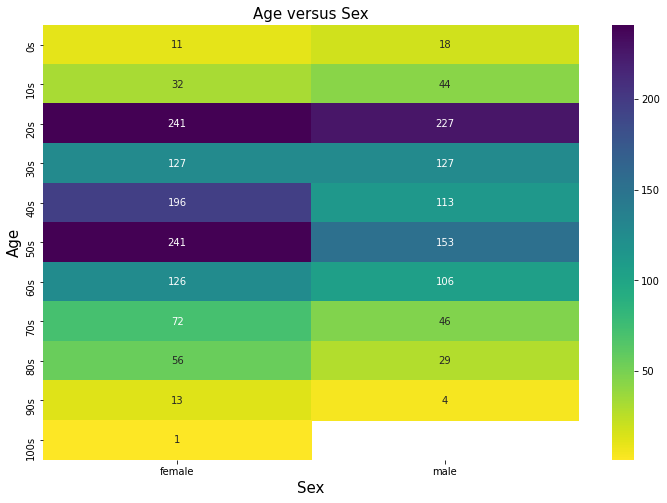

In [15]:
plt.figure(figsize=[12,8])
sex_age_counts = patient_df.groupby(['sex','age']).size()
sex_age_counts = sex_age_counts.reset_index(name='count')
sex_age_counts = sex_age_counts.pivot(index='age',columns='sex',values='count')
sb.heatmap(sex_age_counts,annot=True,fmt='0.0f',cmap='viridis_r');
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.title('Age versus Sex',fontsize=15);

## Investigating the relation between age, sex, contact number variables

by investigating the age, sex and contact variables together by a facet grid using boxplot, I noticed that in age ranges (20s, 30s, 40s, 50s) male gender has more contact than female gender. In other age ranges they pretty similar. This observation may suggest that male in different age ranges contact more people than female before being diagnosed with coronavirus. This fact may be due to the gender inequality issue in South Korea where men have higher proportions in education enviroment and work enviroment. https://en.wikipedia.org/wiki/Gender_inequality_in_South_Korea 

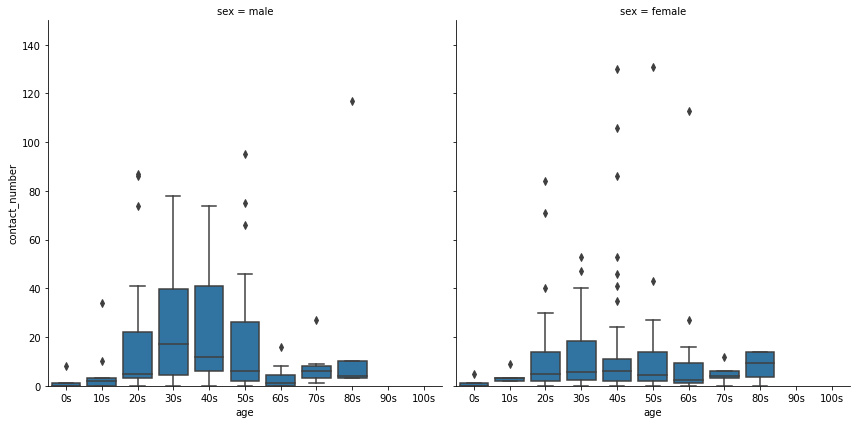

In [20]:
# plotting a FacetGrid to investigate the relation between two categorical variables (age,sex) with one numerical variable (contact_number)
g = sb.FacetGrid( data = patient_df, col = 'sex',height=6,ylim=(0,150))
g.map(sb.boxplot,'age','contact_number')

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!